# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [ ]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
# validation_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

In [8]:
!kaggle datasets download -d saadpd/menwomen-classification

Dataset URL: https://www.kaggle.com/datasets/saadpd/menwomen-classification
License(s): copyright-authors
 98% 789M/806M [00:06<00:00, 210MB/s]
100% 806M/806M [00:06<00:00, 127MB/s]


In [9]:
!unzip menwomen-classification.zip

Archive:  menwomen-classification.zip
  inflating: testdata/testdata/men/00000001.jpg  
  inflating: testdata/testdata/men/00000002.jpg  
  inflating: testdata/testdata/men/0000000296.png  
  inflating: testdata/testdata/men/00000003.jpg  
  inflating: testdata/testdata/men/00000004.jpg  
  inflating: testdata/testdata/men/00000005.jpg  
  inflating: testdata/testdata/men/00000006.jpg  
  inflating: testdata/testdata/men/00000007.jpg  
  inflating: testdata/testdata/men/00000008.jpg  
  inflating: testdata/testdata/men/00000009.jpg  
  inflating: testdata/testdata/men/00000010.jpg  
  inflating: testdata/testdata/men/00000011.jpg  
  inflating: testdata/testdata/men/00000012.jpg  
  inflating: testdata/testdata/men/00000013.jpg  
  inflating: testdata/testdata/men/00000014.jpg  
  inflating: testdata/testdata/men/00000015.jpg  
  inflating: testdata/testdata/men/00000016.jpg  
  inflating: testdata/testdata/men/00000017.jpg  
  inflating: testdata/testdata/men/00000018.jpg  
  inflatin

In [ ]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
# validation_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

In [11]:
#load
dataagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = dataagen.flow_from_directory('/content/traindata/traindata',target_size=(50, 50), batch_size=32, class_mode='binary', subset='training')
test_generator = dataagen.flow_from_directory('/content/testdata/testdata',target_size=(50, 50), batch_size=32, class_mode='binary', subset='validation')




Found 2313 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [ ]:
# Data Augmentation
# Example:
# datagen_train = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

In [13]:
#Data augmentation
dataagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [ ]:
# Build the model
# Example:
# model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D(2, 2),
#    Conv2D(64, (3, 3), activation='relu'),
#    MaxPooling2D(2, 2),
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dropout(0.5),
#    Dense(num_classes, activation='softmax')
# ])
# model.summary()

In [14]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,010,881 (3.86 MB)

 Trainable params: 1,010,881 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [ ]:
# Compile the model
# Example:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [ ]:
# Train the model
# Example:
# history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

In [16]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 533ms/step - accuracy: 0.6343 - loss: 0.6624 - val_accuracy: 0.6868 - val_loss: 0.6259
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 482ms/step - accuracy: 0.6552 - loss: 0.6238 - val_accuracy: 0.7019 - val_loss: 0.5754
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 466ms/step - accuracy: 0.6747 - loss: 0.6004 - val_accuracy: 0.6943 - val_loss: 0.5547
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 456ms/step - accuracy: 0.7026 - loss: 0.5650 - val_accuracy: 0.7283 - val_loss: 0.5290
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 476ms/step - accuracy: 0.7163 - loss: 0.5465 - val_accuracy: 0.7849 - val_loss: 0.4779
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.7664 - loss: 0.4986 - val_accuracy: 0.7736 - val_loss: 0.4582
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 462ms/step - accuracy: 0.7550 - loss: 0.4694 - val_accuracy: 0.7660 - val_loss: 0.4351
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 436ms/step - accuracy: 0.8179 - loss: 0.3904 - val_accuracy: 0.766

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [ ]:
# Evaluate the model
# Example:
# loss, accuracy = model.evaluate(validation_generator)
# print(f'Validation Loss: {loss}')
# print(f'Validation Accuracy: {accuracy}')

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.7356 - loss: 0.5125
Validation Loss: 0.4873974025249481
Validation Accuracy: 0.7358490824699402


## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
# Save the model
# Example:
# model.save('my_cnn_model.h5')

In [23]:
# Save the model
#model.save('my_cnn_model.h5')
model.save('my_model.keras')

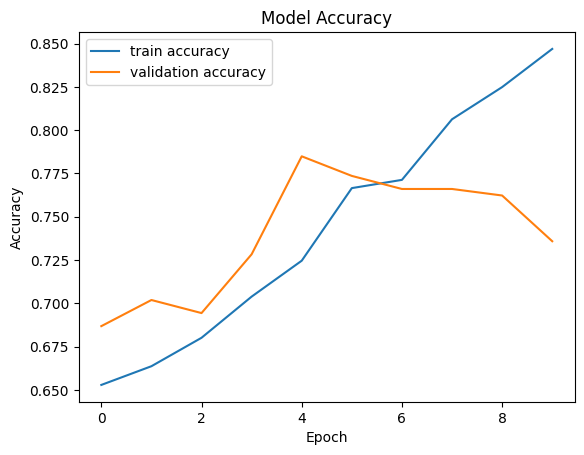

In [22]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()